In [41]:
# importing packages
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns

In [42]:
#Loading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_dataset.csv')

### Let's have a look at what our data is like

In [43]:
data.shape

(280, 6)

In [44]:
data.columns

Index(['SWI', 'SWF', 'temperature', 'size', 'management', 'duration'], dtype='object')

Please find the variable description of the dataset variables below:

**SWI** - The Shannon-Wiener index for (flying nocturnal) invertebrate diversity on the patch (non-negative, larger values denote higher diversity).

**SWF** - An (adjusted) Shannon-Wiener index for floristic diversity on the patch. The interpretation of this metric is the same as for SWI (non-negative, larger values denote higher diversity).


**Temperature** - Temperature at the sampling event (in degrees Celsius).

**Size** - The size of the sampling patch (in m2)

**Management** - The number of years that the patch has been subject to nature management

**Duration** - The duration of a sampling event (in minutes)

** *To Predict* SWI**



In [45]:
data.head()

,SWI,SWF,temperature,size,management,duration
0,0.59,1.30,3.5,0.5,2,20
1,1.21,1.85,4.6,47.2,3,19
2,1.08,0.97,4.8,53.3,4,22
3,1.60,1.67,5.2,27.2,8,20
4,2.95,2.41,5.7,38.8,6,22


In [46]:
data.tail()

,SWI,SWF,temperature,size,management,duration
275,2.38,1.30,21.5,2.9,7,38
276,2.68,1.19,21.6,40.8,7,36
277,2.41,0.98,21.6,33.7,4,37
278,2.66,2.01,21.6,22.8,7,38
279,1.20,0.63,21.6,30.1,4,36


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SWI          280 non-null    float64
 1   SWF          280 non-null    float64
 2   temperature  280 non-null    float64
 3   size         280 non-null    float64
 4   management   280 non-null    int64  
 5   duration     280 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 13.2 KB


In [48]:
data.describe()

,SWI,SWF,temperature,size,management,duration
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,1.896714,1.480679,16.372500,41.138214,4.082143,31.307143
std,0.610995,0.476403,3.619312,19.434496,2.520959,4.198304
min,0.480000,0.250000,3.500000,0.500000,0.000000,19.000000
25%,1.507500,1.190000,14.100000,27.275000,2.000000,29.000000
50%,1.825000,1.495000,17.050000,41.100000,4.000000,32.000000
75%,2.282500,1.790000,19.125000,54.725000,6.000000,34.000000
max,3.790000,2.840000,21.600000,94.200000,8.000000,41.000000


In [49]:
# Checking if there is any null values in our data
data.isna().sum()

SWI            0
SWF            0
temperature    0
size           0
management     0
duration       0
dtype: int64

### Finding Correaltion

In [50]:
data.corr()

,SWI,SWF,temperature,size,management,duration
SWI,1.000000,0.680071,0.254698,-0.016571,0.300495,0.214081
SWF,0.680071,1.000000,-0.065078,0.004630,0.077577,-0.093165
temperature,0.254698,-0.065078,1.000000,0.006262,-0.007137,0.874055
size,-0.016571,0.004630,0.006262,1.000000,0.020412,-0.043318
management,0.300495,0.077577,-0.007137,0.020412,1.000000,-0.017970
duration,0.214081,-0.093165,0.874055,-0.043318,-0.017970,1.000000


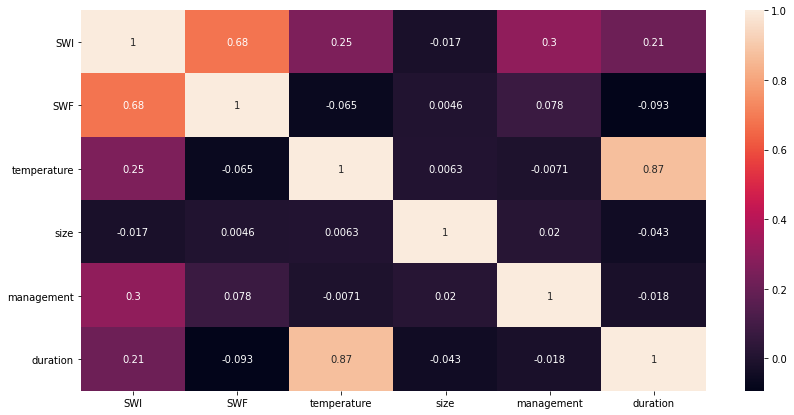

In [51]:
plt.figure(figsize = (14, 7))
sns.heatmap(data.corr(), annot = True)

In [52]:
corr_data = data.corrwith(data["SWI"])
print(corr_data)

SWI            1.000000
SWF            0.680071
temperature    0.254698
size          -0.016571
management     0.300495
duration       0.214081
dtype: float64


In [53]:
corr_data.sort_values(ascending=False)

SWI            1.000000
SWF            0.680071
management     0.300495
temperature    0.254698
duration       0.214081
size          -0.016571
dtype: float64

### EDA or Data Visualization

In [54]:
data['management'].value_counts()

7    38
5    35
1    34
4    32
6    31
2    31
3    28
8    26
0    25
Name: management, dtype: int64

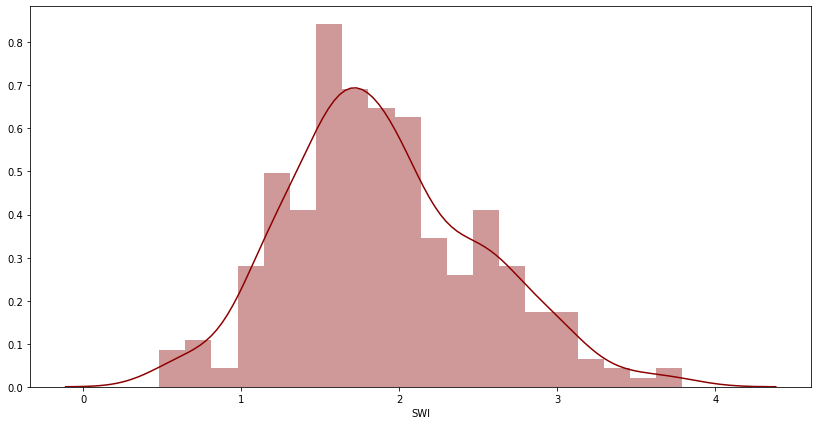

In [55]:
plt.figure(figsize = (14, 7))
sns.distplot(data['SWI'],color= 'darkred',bins=20)

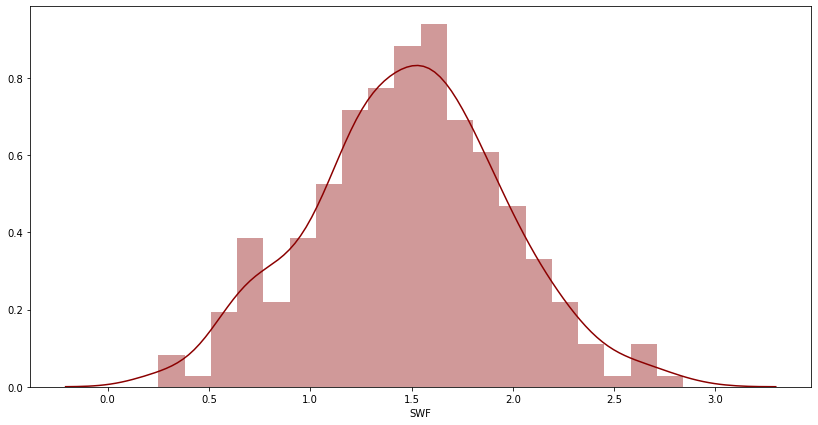

In [56]:
plt.figure(figsize = (14, 7))
sns.distplot(data['SWF'],color= 'darkred',bins=20)

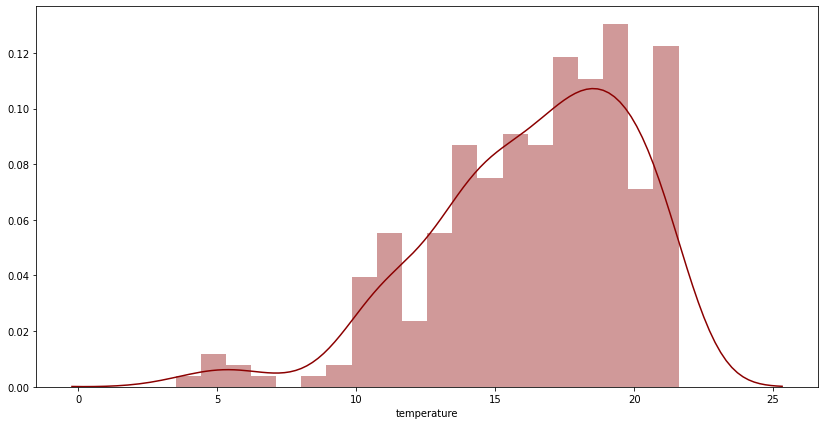

In [57]:
plt.figure(figsize = (14, 7))
sns.distplot(data['temperature'],color= 'darkred',bins=20)

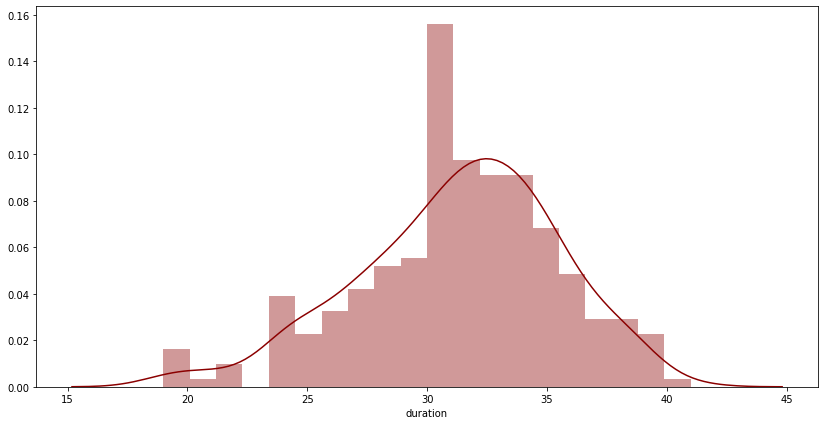

In [58]:
plt.figure(figsize = (14, 7))
sns.distplot(data['duration'],color= 'darkred',bins=20)

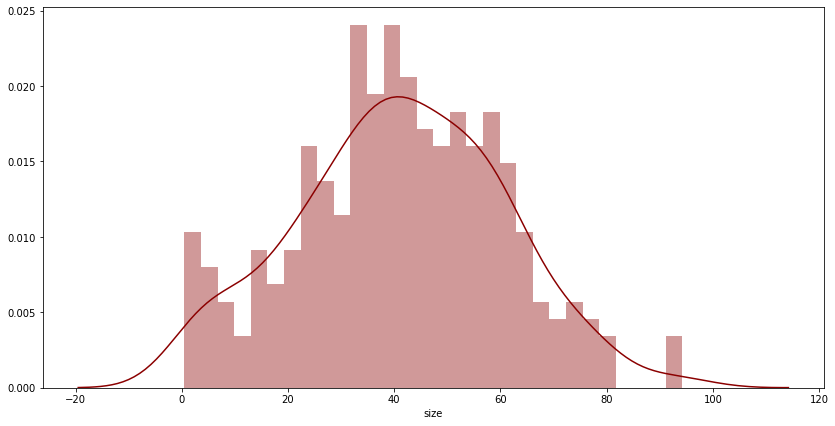

In [59]:
plt.figure(figsize = (14, 7))
sns.distplot(data['size'],color= 'darkred',bins=30)

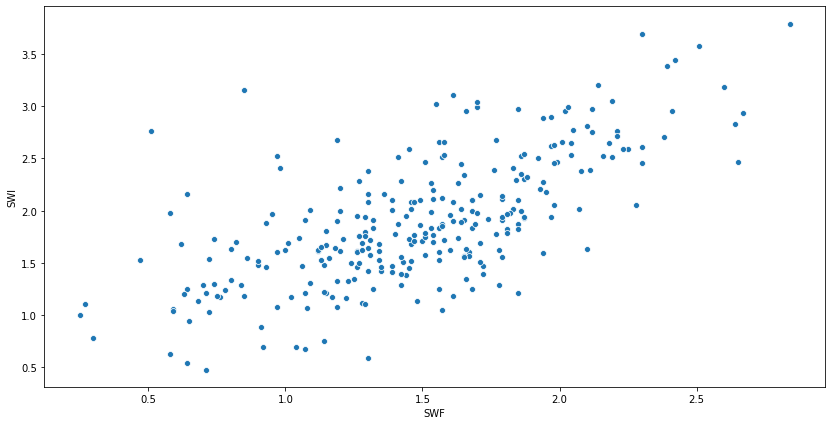

In [60]:
plt.figure(figsize = (14, 7))
sns.scatterplot(x='SWF',y='SWI',data=data,palette='rainbow')

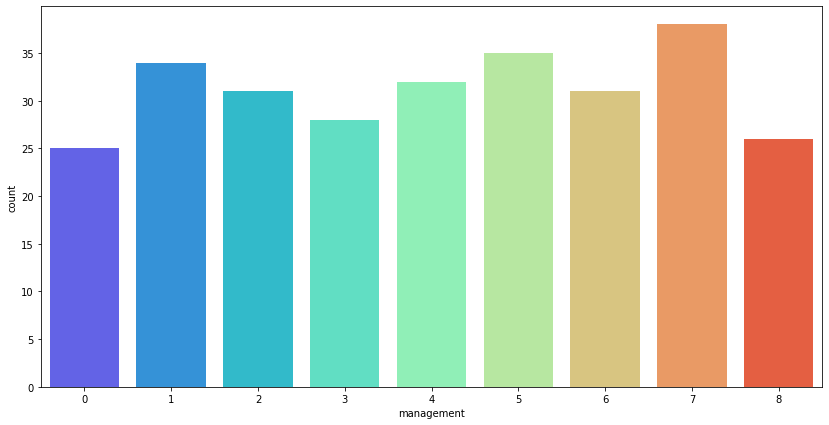

In [61]:
plt.figure(figsize = (14, 7))
sns.countplot('management',data=data,palette='rainbow')

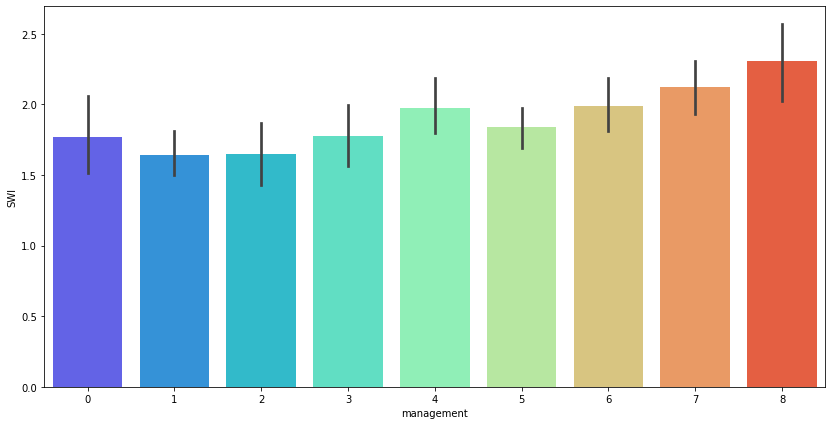

In [62]:
plt.figure(figsize = (14, 7))
sns.barplot(x='management',y='SWI',data=data,palette='rainbow')

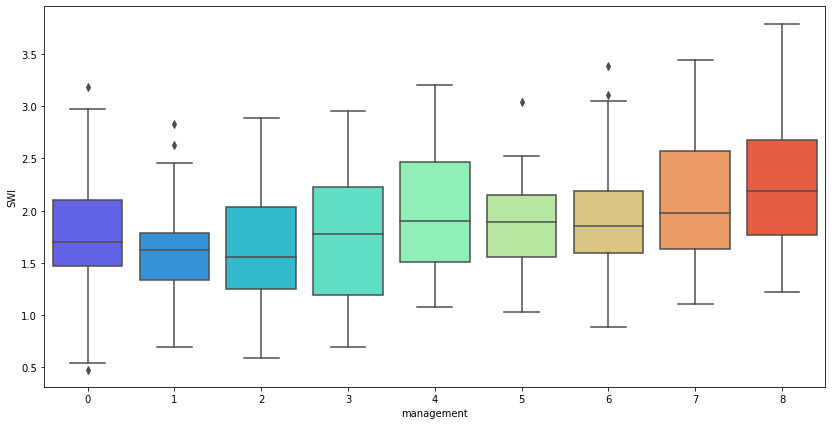

In [63]:
plt.figure(figsize = (14, 7))
sns.boxplot(x='management',y='SWI',data=data,palette='rainbow')

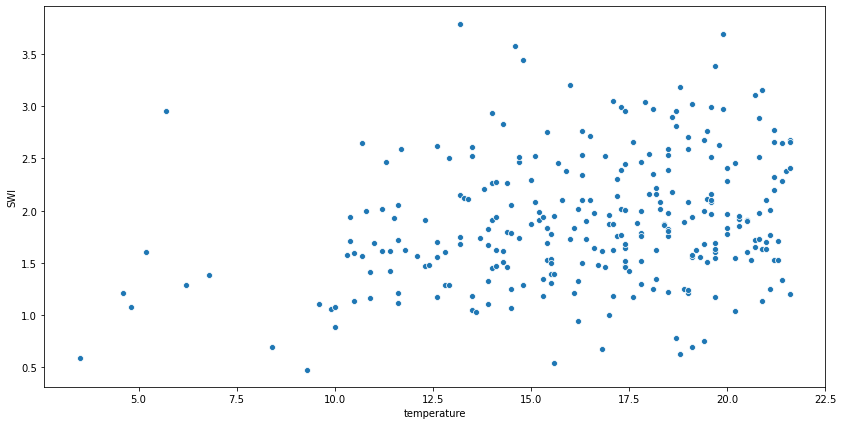

In [64]:
plt.figure(figsize = (14, 7))
sns.scatterplot(x='temperature',y='SWI',data=data,palette='rainbow')

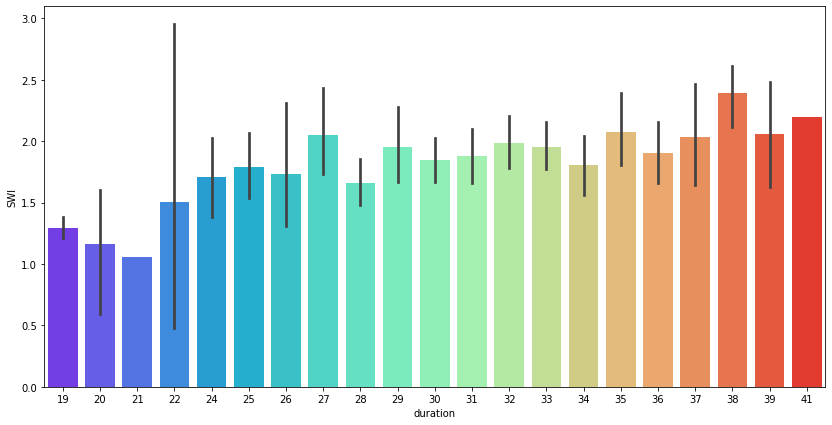

In [65]:
plt.figure(figsize = (14, 7))
sns.barplot(x='duration',y='SWI',data=data,palette='rainbow')

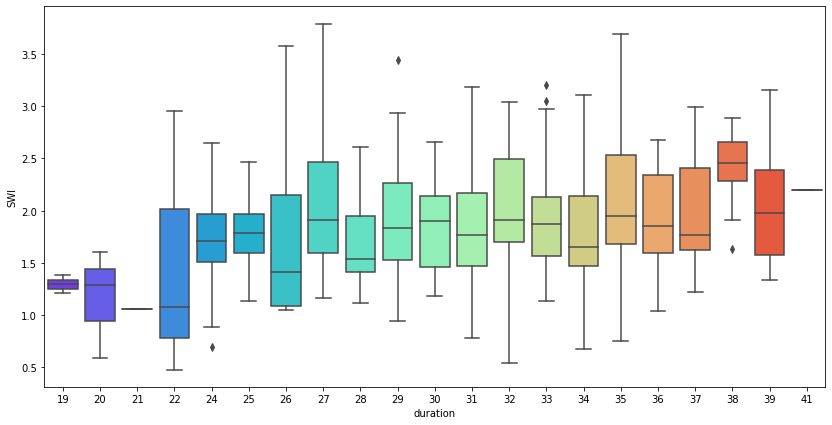

In [66]:
plt.figure(figsize = (14, 7))
sns.boxplot(x='duration',y='SWI',data=data,palette='rainbow')

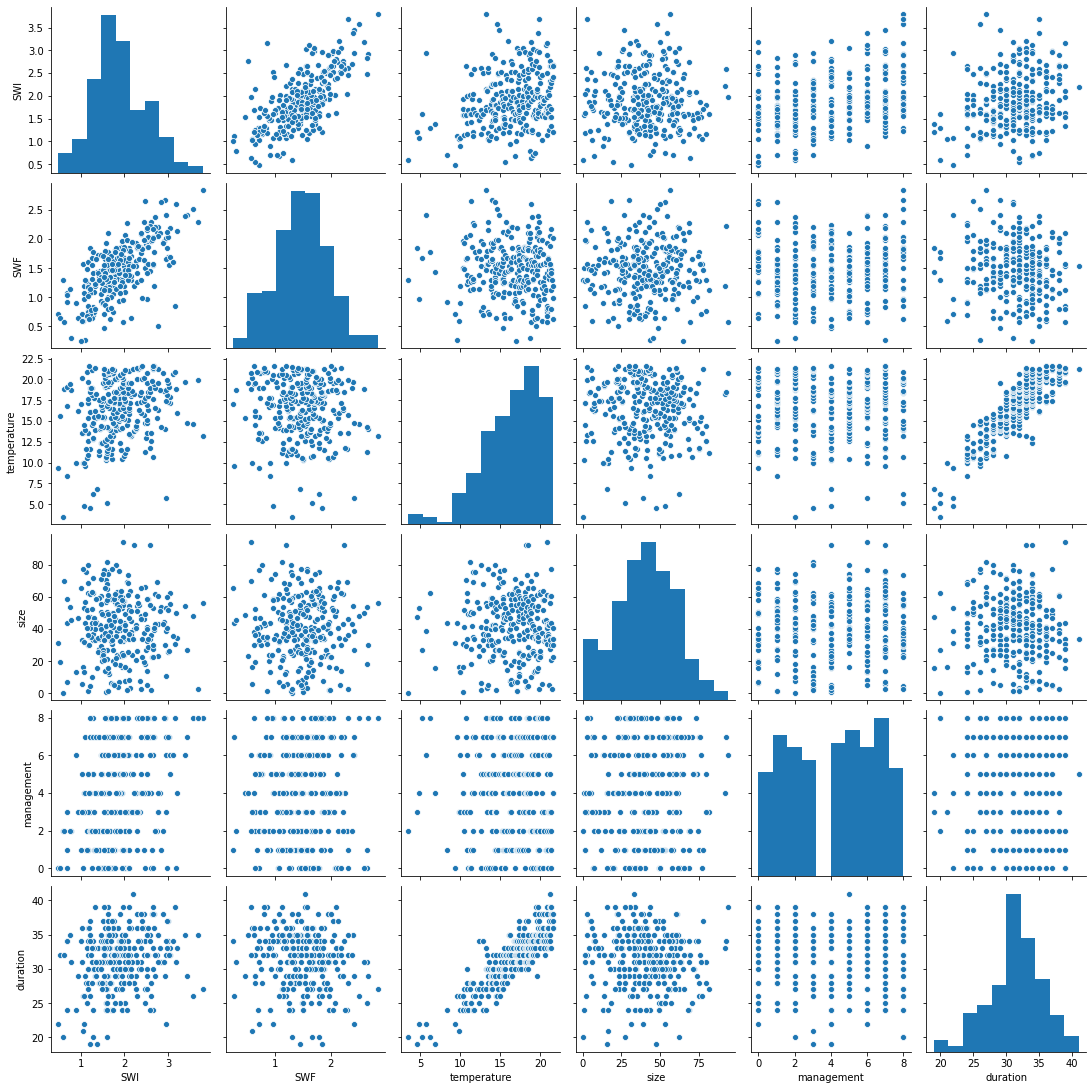

In [67]:
sns.pairplot(data, palette= 'rainbow')

### Splitting the data into Training and Testing set

In [68]:
X = data.drop(['SWI'],axis=1)

y = data['SWI']

In [69]:
X.head()

,SWF,temperature,size,management,duration
0,1.30,3.5,0.5,2,20
1,1.85,4.6,47.2,3,19
2,0.97,4.8,53.3,4,22
3,1.67,5.2,27.2,8,20
4,2.41,5.7,38.8,6,22


In [70]:
y.head()

0    0.59
1    1.21
2    1.08
3    1.60
4    2.95
Name: SWI, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Creating and Training the Model

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lm = LinearRegression()

In [75]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Checking the Model 

In [76]:
# print the intercept
print(lm.intercept_)

-0.544257526958724


In [77]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
SWF,0.868875
temperature,0.050242
size,-0.001101
management,0.065638
duration,0.003264


### Predictions from our Model

In [78]:
predictions = lm.predict(X_test)

In [79]:
predictions

array([1.80804467, 2.79145675, 2.32798313, 1.48464931, 1.77606403,
       2.30370378, 1.89732188, 2.23435655, 2.70575   , 1.98864636,
       2.20390694, 1.65988629, 2.27116307, 2.18397953, 2.33582616,
       1.62492326, 2.28398953, 2.97010856, 2.12876368, 2.53360947,
       1.1277295 , 1.64871736, 2.04949176, 2.09690987, 1.98119537,
       1.73745488, 2.15314964, 1.5426051 , 0.94145909, 1.86319226,
       2.37377823, 1.17865848, 1.68137386, 2.18207825, 2.50080678,
       1.20615437, 1.2248211 , 1.67789173, 1.43651044, 2.14548068,
       2.08150427, 1.89045586, 1.59288793, 2.25904879, 1.9600206 ,
       1.65130698, 1.52558329, 1.45737682, 1.79332004, 2.58280219,
       1.98546759, 1.8633067 , 2.05496112, 0.66901447, 2.72720796,
       1.89329997])

### Evaluation Metrics

In [80]:
from sklearn import metrics

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:',metrics.r2_score(y_test, predictions))

MAE: 0.31736444775185324
MSE: 0.16175621079249755
RMSE: 0.40218927234885016
R^2: 0.5290470896342474


## Test Data

In [82]:
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_new_test_data.csv')

In [83]:
prediction0 = lm.predict(test)

In [84]:
prediction0

array([1.69708192, 2.02122953, 2.38929459, 2.73743542, 1.79398228,
       3.18942922, 2.39917348, 2.32747457, 1.95647599, 1.97309365,
       2.46271395, 2.20676391, 1.85579447, 2.98738163, 1.72924535,
       2.11849592, 2.38425936, 1.9289558 , 1.96208834, 2.02755517,
       2.87433985, 1.73937934, 2.57055439, 2.35332511, 2.92519312,
       2.42599535, 1.76141889, 2.05100358, 3.13286186, 1.64560297,
       2.32570815, 2.08304132, 2.97664303, 2.80754678, 1.83203348,
       2.89043334, 2.93898998, 2.41520298, 1.78193692, 1.81681468,
       1.56618884, 2.60744623, 2.93214987, 2.87677464, 2.27398742,
       2.80349288, 1.75916345, 2.12581436, 2.73807388, 2.98177969,
       1.79935811, 2.78124806, 2.75932683, 2.54917276, 2.27278091,
       1.85084555, 2.41175284, 1.39823386, 1.92923605, 2.6123008 ,
       2.60242381, 2.7406737 , 2.08352558, 2.61663711, 2.237777  ,
       2.29403162, 2.34997641, 1.52562663, 1.89994056, 2.99444005,
       3.53741168, 1.2130372 , 2.71773938, 2.39836231, 3.15645

In [85]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(prediction0)
res.index = test_new.index # its important for comparison
res.columns = ["predictions"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results_0.csv')         
files.download('prediction_results_0.csv')'''

'# To create Dataframe of predicted value with particular respective index\nres = pd.DataFrame(prediction0)\nres.index = test_new.index # its important for comparison\nres.columns = ["predictions"]\n\n# To download the csv file locally\nfrom google.colab import files\nres.to_csv(\'prediction_results_0.csv\')         \nfiles.download(\'prediction_results_0.csv\')'

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf = RandomForestRegressor(n_estimators=300)

In [88]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [89]:
y_pred = rf.predict(X_test)

In [90]:
y_pred

array([1.5544    , 2.99046667, 2.2775    , 1.3895    , 1.6528    ,
       2.27776667, 1.8406    , 2.11263333, 2.73163333, 1.93286667,
       2.47563333, 1.52743333, 1.96126667, 2.55793333, 2.2684    ,
       1.63613333, 2.22      , 3.05593333, 2.19276667, 2.6604    ,
       1.19726667, 1.4973    , 2.051     , 1.93426667, 1.9489    ,
       1.76333333, 2.67203333, 1.4964    , 1.32166667, 1.83833333,
       2.5616    , 1.17836667, 1.7716    , 2.0026    , 2.37566667,
       1.2051    , 1.14      , 1.91306667, 1.69153333, 2.3853    ,
       1.76076667, 1.61046667, 1.54053333, 2.91486667, 1.93156667,
       1.8274    , 1.41946667, 1.55476667, 1.8051    , 2.4156    ,
       1.68136667, 1.85296667, 1.98956667, 1.27973333, 2.69476667,
       1.8015    ])

In [91]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:',metrics.r2_score(y_test, y_pred))

MAE: 0.28924107142857086
MSE: 0.1338708368055552
RMSE: 0.3658836383408736
R^2: 0.6102353047355191


In [92]:
from sklearn.model_selection import GridSearchCV

# setting the static parameters
rfr = RandomForestRegressor(bootstrap=True, random_state=0)

In [93]:
param_grid = dict(n_estimators=[10, 25, 50, 100, 200,300,400],
                  max_depth=[5, 10, 20, 30, 40, 50],
                  min_samples_leaf=[1,2,4,6,8])

In [94]:
grid = GridSearchCV(rfr, param_grid, cv=10,
                    scoring='neg_mean_squared_error')

In [95]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [96]:
print("-grid.best_score_ {}".format(-grid.best_score_))
print("grid.best_params_ {}".format(grid.best_params_))
print("grid.best_estimator_ {}".format(grid.best_estimator_))  

-grid.best_score_ 0.15912659848360008
grid.best_params_ {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}
grid.best_estimator_ RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)


In [97]:
pred = grid.predict(X_test)

In [98]:
pred

array([1.64661584, 3.02617681, 2.24511518, 1.44467262, 1.68296879,
       2.26644618, 1.83369272, 2.07060767, 2.70423502, 1.89778043,
       2.30651087, 1.48628012, 2.04192586, 2.53461623, 2.25575231,
       1.64286399, 2.26383606, 3.10380908, 2.11444247, 2.59612405,
       1.18570011, 1.5475097 , 2.05169734, 1.85407627, 1.94219768,
       1.67759746, 2.69500464, 1.53276095, 1.30346786, 1.8137985 ,
       2.46262141, 1.30297771, 1.68398603, 1.99635636, 2.22669845,
       1.2492939 , 1.1217544 , 1.73818657, 1.60368088, 2.16848163,
       1.82304914, 1.68619497, 1.58550882, 2.92940674, 1.82083491,
       1.79218469, 1.43748271, 1.48439972, 1.85301801, 2.32434006,
       1.80833599, 1.87268806, 1.90591376, 1.24584864, 2.67074247,
       1.80225717])

In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R^2:',metrics.r2_score(y_test, pred))

MAE: 0.28955253370946227
MSE: 0.13193413023399395
RMSE: 0.3632273808979631
R^2: 0.6158740223583702
